# FLARUBIN 
## Testing NB

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarnin

Flux contribution of a flare corresponding to 10000K BB + MD spectrum with FF = 0.05. Expected = 0.5, Result = 0.5


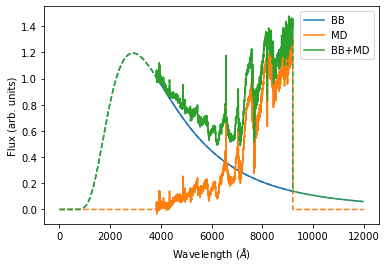

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from utils import *
from config import *
import globals
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mdwarf_interp import mdwarf_interp

import warnings

def fxn():
    warnings.warn("runtime", RuntimeWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

globals.initialize()

TEMP = 10000

mdinterp = mdwarf_interp('m5.active.ha.na.k.fits', plotit=False)
md = mdinterp(WAVELENGTH)

bb = make_bb(WAVELENGTH, TEMP) * globals.BBnorm
md_bb = md + bb

def bb_fraction(md, T=10000, ff=globals.FF):
    bb = make_bb(WAVELENGTH, T) * globals.BBnorm
    ff = ff / globals.FF #makes ff = 1.0 by default
    md_bb = md + bb * ff
    return sed_integ(WAVELENGTH[WMIN:WMAX], bb[WMIN:WMAX]*ff) / sed_integ(WAVELENGTH[WMIN:WMAX],md_bb[WMIN:WMAX])

#TEST:
result = bb_fraction(md)
print('Flux contribution of a flare corresponding to 10000K BB + MD spectrum with FF = 0.05. Expected = 0.5, Result = {}'.format(result))

assert result == 0.5, "WARNING: FAILED NORMALIZATION TEST"

plt.plot(WAVELENGTH[WMIN:WMAX], bb[WMIN:WMAX], c='C0', label='BB')
plt.plot(WAVELENGTH[WMIN:WMAX], md[WMIN:WMAX], c='C1', label='MD')
plt.plot(WAVELENGTH[WMIN:WMAX], bb[WMIN:WMAX]+md[WMIN:WMAX], c='C2', label='BB+MD')
plt.legend();
plt.plot(WAVELENGTH, bb, c='C0', ls='--', label='BB')
plt.plot(WAVELENGTH, md, c='C1', ls='--', label='MD')
plt.plot(WAVELENGTH, bb+md, c='C2', ls='--', label='BB+MD')
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel('Flux (arb. units)')
plt.savefig('Figures/bb_calib.png', dpi=300, bbox_inches='tight');

In [2]:
#what is the fract of total MD flux + BB ff 5% if BB T = 5000, what is total flux contributed by BB?

print(sed_integ(WAVELENGTH, md), sed_integ(WAVELENGTH[WMIN:WMAX], bb[WMIN:WMAX]),sed_integ(WAVELENGTH[WMIN:WMAX], md_bb[WMIN:WMAX]))

2354.9463148098057 2354.9463148098052 4709.8926296196105


/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


in R DCR should be 57.1 arcsec:  26.148239108896696


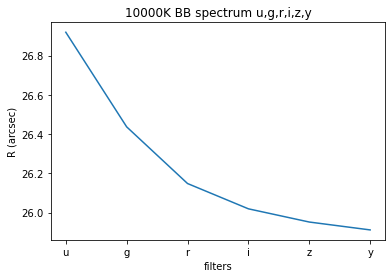

In [3]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']

weff = np.array([lamb_eff_BB(band=f, temp=TEMP, verbose=False) for f in filters])
plt.plot(dcr_offset(weff, airmass = globals.airmass))
plt.xlabel("filters")
plt.ylabel("R (arcsec)")
plt.xticks(range(6), labels=["u","g","r","i","z","y"])
plt.title("{}K BB spectrum u,g,r,i,z,y".format(TEMP))
print("in R DCR should be 57.1 arcsec: ", dcr_offset(weff[2], airmass = globals.airmass))

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


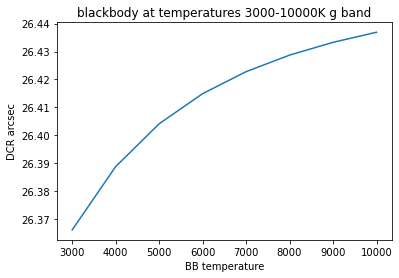

In [4]:
weff = np.array([lamb_eff_BB(band="g", temp=t, verbose=False) for t in range(3000,11000,1000)])
plt.plot(range(3000,11000,1000), dcr_offset(weff, airmass = globals.airmass))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K g band");

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


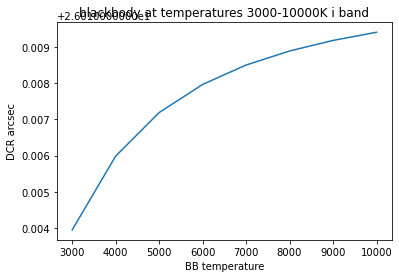

In [5]:
weff = np.array([lamb_eff_BB(band="i", temp=t, verbose=False) 
                 for t in range(3000,11000,1000)])
plt.plot(range(3000,11000,1000),dcr_offset(weff, airmass = globals.airmass))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K i band");

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarnin

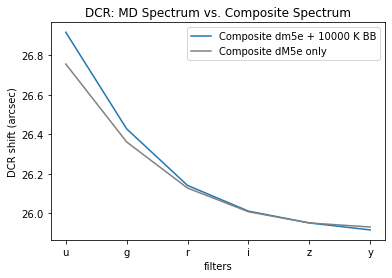

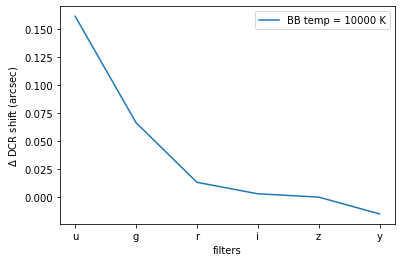

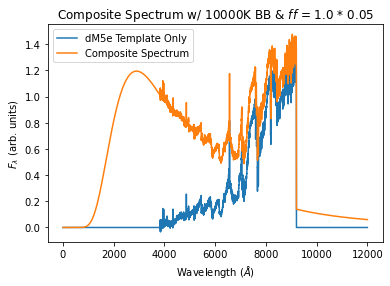

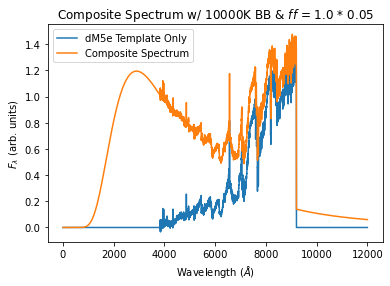

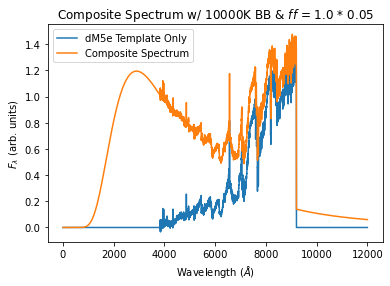

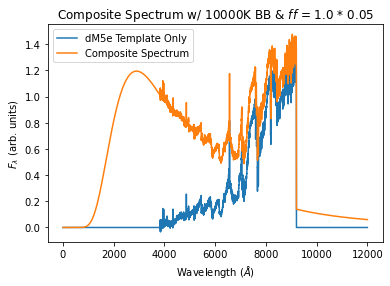

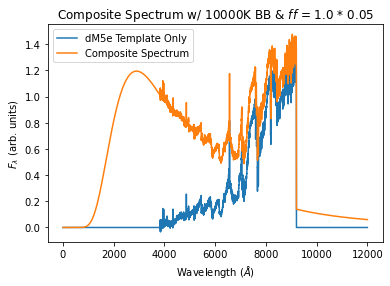

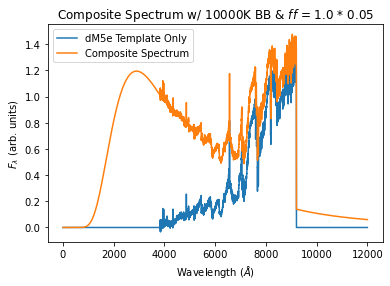

In [7]:
fig1, ax1 = plt.subplots(1,1)
fig2, ax2 = plt.subplots(1,1)

w_eff1 = np.array([lamb_eff_md(band=f, temp=TEMP, mdonly=True) for f in filters])
w_eff2 = np.array([lamb_eff_md(band=f, temp=TEMP, compplot=True) for f in filters])

ax1.plot(dcr_offset(w_eff2, airmass = globals.airmass), label='Composite dm5e + {} K BB'.format(TEMP))
ax1.plot(dcr_offset(w_eff1, airmass = globals.airmass), c='grey', label="Composite dM5e only")

ax1.set_ylabel("DCR shift (arcsec)")
ax1.set_xlabel("filters")
ax1.set_xticks(range(6))
ax1.set_xticklabels(["u","g","r","i","z","y"])
ax1.set_title("DCR: MD Spectrum vs. Composite Spectrum")
ax1.legend()

ax2.plot(dcr_offset(w_eff2, airmass = globals.airmass) - dcr_offset(w_eff1, airmass = globals.airmass), label='BB temp = {} K'.format(TEMP))
ax2.set_ylabel(r"$\Delta$ DCR shift (arcsec)")
ax2.set_xlabel("filters")
ax2.set_xticks(range(6))
ax2.set_xticklabels(["u","g","r","i","z","y"])
ax2.legend()

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarnin

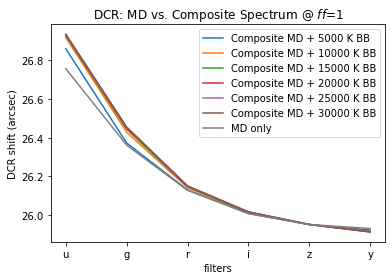

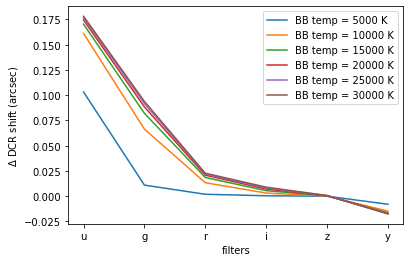

In [343]:
fig1, ax1 = plt.subplots(1,1)
fig2, ax2 = plt.subplots(1,1)

for temp in range(5000,35000,5000):

    w_eff1 = np.array([lamb_eff_md(band=f, temp=temp, mdonly=True) for f in filters])
    w_eff2 = np.array([lamb_eff_md(band=f, temp=temp) for f in filters])

    ax1.plot(dcr_offset(w_eff2, airmass = globals.airmass), label='Composite MD + {} K BB'.format(temp))
    ax2.plot(dcr_offset(w_eff2, airmass = globals.airmass) - dcr_offset(w_eff1, airmass = globals.airmass), label='BB temp = {} K'.format(temp))

ax1.plot(dcr_offset(w_eff1, airmass = globals.airmass), c='grey', label="MD only")
ax1.set_ylabel("DCR shift (arcsec)")
ax1.set_xlabel("filters")
ax1.set_xticks(range(6))
ax1.set_xticklabels(["u","g","r","i","z","y"])
ax1.set_title(r"DCR: MD vs. Composite Spectrum @ $ff$=1")
ax1.legend()


ax2.set_ylabel(r"$\Delta$ DCR shift (arcsec)")
ax2.set_xlabel("filters")
ax2.set_xticks(range(6))
ax2.set_xticklabels(["u","g","r","i","z","y"])
ax2.legend()

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


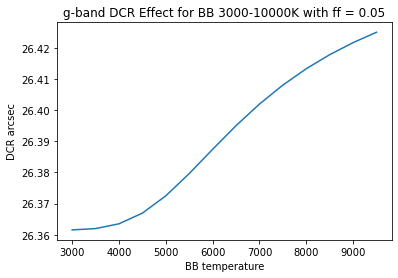

In [344]:
w_eff = np.array([lamb_eff_md(band='g', temp=t) for t in range(3000,10000,500)])
plt.plot(range(3000,10000,500), dcr_offset(w_eff, airmass = globals.airmass))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("g-band DCR Effect for BB 3000-10000K with ff = 0.05");

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


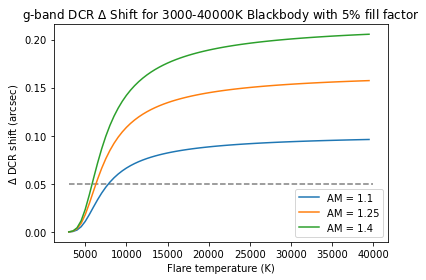

In [357]:
w_eff1 = np.array([lamb_eff_md(band='g', temp=t, ff=globals.FF, mdonly=True) for t in range(3000,40000,500)])
w_eff2 = np.array([lamb_eff_md(band='g', temp=t, ff=globals.FF) for t in range(3000,40000,500)])
plt.plot(range(3000,40000,500), dcr_offset(w_eff2, airmass = 1.1)-dcr_offset(w_eff1, airmass = 1.1), label="AM = 1.1")
plt.plot(range(3000,40000,500), dcr_offset(w_eff2, airmass = 1.25)-dcr_offset(w_eff1, airmass = 1.25), label="AM = 1.25")
plt.plot(range(3000,40000,500), dcr_offset(w_eff2, airmass = 1.4)-dcr_offset(w_eff1, airmass = 1.4), label="AM = 1.4")
plt.hlines(0.05,3000,40000, color='grey', ls='--')
plt.ylabel(r"$\Delta$ DCR shift (arcsec)")
plt.xlabel("Flare temperature (K)")
plt.title(r"g-band DCR $\Delta$ Shift for 3000-40000K Blackbody with 5% fill factor")
plt.legend()
plt.savefig('Figures/deltashifttemp_g.png', dpi=300, bbox_inches='tight')

## Gridplots

In [346]:
def makegrid(temp, ff, ams, delta=False):

    grid = np.zeros((6,6))

    ams = ams

    if delta:
        for i, am in enumerate(ams):
            for j, f in enumerate(filters):
                w_eff1 = lamb_eff_md(band=f, temp=temp, ff=ff, mdonly=True) 
                w_eff2 = lamb_eff_md(band=f, temp=temp, ff=ff) 
                grid[i][j] = dcr_offset(w_eff2, airmass=am) - dcr_offset(w_eff1,airmass=am)

    else:
        for i, am in enumerate(ams):
            for j, f in enumerate(filters):
                w_eff = lamb_eff_md(band=f, temp=temp, ff=ff) 
                grid[i][j] = dcr_offset(w_eff, airmass=am)

    return grid

In [347]:
#Generate grids
temp, ff = 5000, globals.FF*4
grid = makegrid(temp, ff, AMS)
deltagrid = makegrid(temp, ff, AMS, delta=True)

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


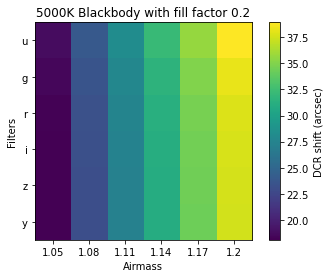

In [348]:
fig3, ax3 = plt.subplots(1,1)

c = ax3.imshow(grid.T)

ax3.set_xticks(range(6))
ax3.set_xticklabels(np.round(AMS, decimals=2))
ax3.set_yticks(range(6))
ax3.set_yticklabels(["u","g","r","i","z","y"])
ax3.set_ylabel("Filters")
ax3.set_xlabel("Airmass")
ax3.set_title('{0}K Blackbody with fill factor {1}'.format(temp, ff))

cbar = fig3.colorbar(c)
cbar.set_label('DCR shift (arcsec)', rotation=90)


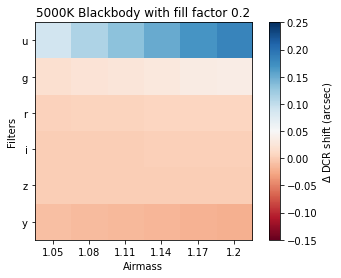

In [349]:
fig3, ax3 = plt.subplots(1,1)

#c = ax3.imshow(deltagrid.T, cmap='Blues', norm=colors.LogNorm(vmin=0.01, vmax=0.4))
c = ax3.imshow(deltagrid.T, cmap='RdBu', clim=(-0.15, 0.25))

ax3.set_xticks(range(6))
ax3.set_xticklabels(np.round(AMS, decimals=2))
ax3.set_yticks(range(6))
ax3.set_yticklabels(["u","g","r","i","z","y"])
ax3.set_ylabel("Filters")
ax3.set_xlabel("Airmass")
ax3.set_title('{0}K Blackbody with fill factor {1}'.format(temp,ff))

cbar = fig3.colorbar(c)
cbar.set_label(r'$\Delta$ DCR shift (arcsec)', rotation=90)

plt.savefig('Figures/deltagridlog{}.png'.format(temp), dpi=300, bbox_inches='tight')

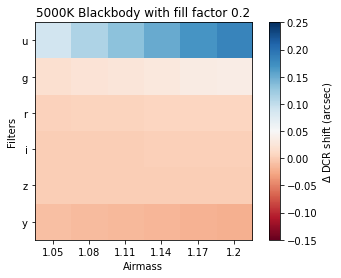

In [350]:
fig3, ax3 = plt.subplots(1,1)

#c = ax3.imshow(deltagrid.T, cmap='Blues', norm=colors.LogNorm(vmin=0.01, vmax=0.4))
c = ax3.imshow(deltagrid.T, cmap='RdBu', clim=(-0.15, 0.25))

ax3.set_xticks(range(6))
ax3.set_xticklabels(np.round(AMS, decimals=2))
ax3.set_yticks(range(6))
ax3.set_yticklabels(["u","g","r","i","z","y"])
ax3.set_ylabel("Filters")
ax3.set_xlabel("Airmass")
ax3.set_title('{0}K Blackbody with fill factor {1}'.format(temp,ff))

cbar = fig3.colorbar(c)
cbar.set_label(r'$\Delta$ DCR shift (arcsec)', rotation=90)

plt.savefig('Figures/deltagridlog{}.png'.format(temp), dpi=300, bbox_inches='tight')

/var/folders/yy/7pyksq_x7bgc3xfdxf46nphm0000gn/T/ipykernel_82608/251895745.py:2: RuntimeWarning: divide by zero encountered in true_divide
  X = np.rad2deg(np.arccos(1/a))
/var/folders/yy/7pyksq_x7bgc3xfdxf46nphm0000gn/T/ipykernel_82608/251895745.py:2: RuntimeWarning: invalid value encountered in arccos
  X = np.rad2deg(np.arccos(1/a))


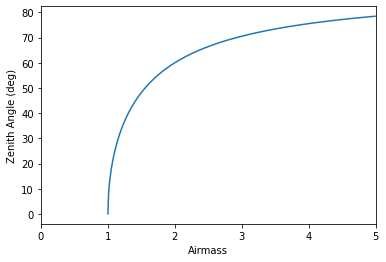

In [351]:
a = np.arange(0,5,0.01)
X = np.rad2deg(np.arccos(1/a))

plt.plot(a, X)
plt.xlabel('Airmass')
plt.ylabel('Zenith Angle (deg)')
plt.xlim(0,5);

In [353]:
temp0, ff0 = 5000, globals.FF
deltagrid0 = makegrid(temp0, ff0, AMS, delta=True)

temp1, ff1 = 10000, globals.FF
deltagrid1 = makegrid(temp1, ff1, AMS, delta=True)

temp2, ff2 = 20000, globals.FF
deltagrid2 = makegrid(temp2, ff2, AMS, delta=True)

temp3, ff3 = 40000, globals.FF
deltagrid3 = makegrid(temp3, ff3, AMS, delta=True)

temp4, ff4 = 5000, globals.FF*4
deltagrid4 = makegrid(temp4, ff4, AMS, delta=True)

temp5, ff5 = 10000, globals.FF*4
deltagrid5 = makegrid(temp5, ff5, AMS, delta=True)

temp6, ff6 = 20000, globals.FF*4
deltagrid6 = makegrid(temp6, ff6, AMS, delta=True)

temp7, ff7 = 40000, globals.FF*4
deltagrid7 = makegrid(temp7, ff7, AMS, delta=True)

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


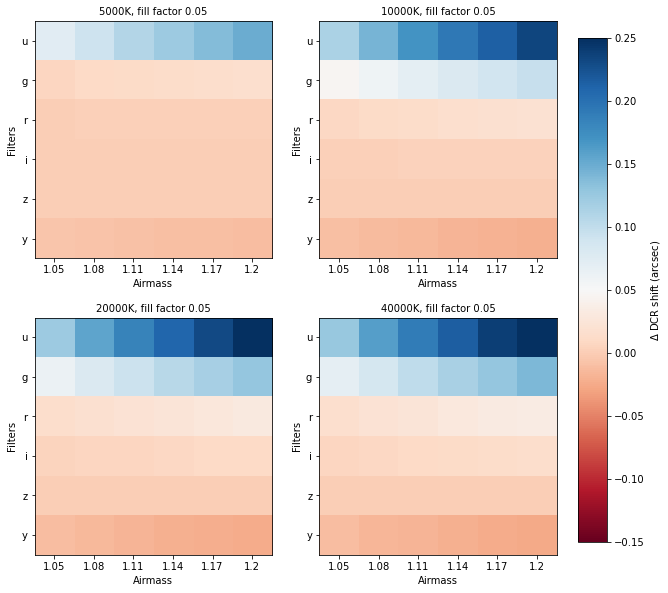

In [354]:
fig5, ax5 = plt.subplots(2,2, figsize=(10,10))

c0 = ax5[0,0].imshow(deltagrid0.T, cmap='RdBu', clim=(-0.15, 0.25))
ax5[0,0].set_xticks(range(6))
ax5[0,0].set_xticklabels(np.round(AMS, decimals=2))
ax5[0,0].set_yticks(range(6))
ax5[0,0].set_yticklabels(["u","g","r","i","z","y"])
ax5[0,0].set_ylabel("Filters")
ax5[0,0].set_xlabel("Airmass")
ax5[0,0].set_title('{0}K, fill factor {1}'.format(temp0,ff0), fontsize=10)

c1 = ax5[0,1].imshow(deltagrid1.T, cmap='RdBu', clim=(-0.15, 0.25))
ax5[0,1].set_xticks(range(6))
ax5[0,1].set_xticklabels(np.round(AMS, decimals=2))
ax5[0,1].set_yticks(range(6))
ax5[0,1].set_yticklabels(["u","g","r","i","z","y"])
ax5[0,1].set_ylabel("Filters")
ax5[0,1].set_xlabel("Airmass")
ax5[0,1].set_title('{0}K, fill factor {1}'.format(temp1,ff1), fontsize=10)

c2 = ax5[1,0].imshow(deltagrid2.T, cmap='RdBu', clim=(-0.15, 0.25))
ax5[1,0].set_xticks(range(6))
ax5[1,0].set_xticklabels(np.round(AMS, decimals=2))
ax5[1,0].set_yticks(range(6))
ax5[1,0].set_yticklabels(["u","g","r","i","z","y"])
ax5[1,0].set_ylabel("Filters")
ax5[1,0].set_xlabel("Airmass")
ax5[1,0].set_title('{0}K, fill factor {1}'.format(temp2,ff2), fontsize=10)

c3 = ax5[1,1].imshow(deltagrid3.T, cmap='RdBu', clim=(-0.15, 0.25))
ax5[1,1].set_xticks(range(6))
ax5[1,1].set_xticklabels(np.round(AMS, decimals=2))
ax5[1,1].set_yticks(range(6))
ax5[1,1].set_yticklabels(["u","g","r","i","z","y"])
ax5[1,1].set_ylabel("Filters")
ax5[1,1].set_xlabel("Airmass")
ax5[1,1].set_title('{0}K, fill factor {1}'.format(temp3,ff3), fontsize=10)

fig5.subplots_adjust(right=0.85)
cbar_ax = fig5.add_axes([0.88, 0.15, 0.04, 0.7])
cbar = fig5.colorbar(c0, cax=cbar_ax)
cbar.set_label(r'$\Delta$ DCR shift (arcsec)')
plt.savefig("Figures/4grid.png", dpi=300, bbox_inches='tight')

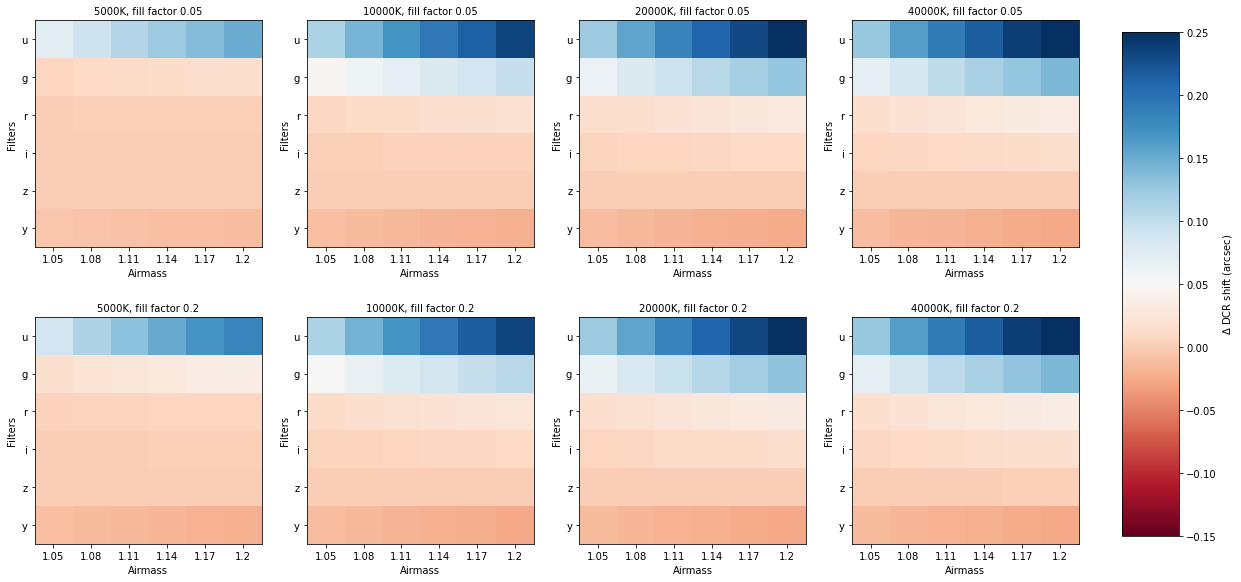

In [355]:
gridtemps = [5000,10000,20000,40000]
gridffs = [globals.FF, globals.FF*4]

#deltagrids = np.array([makegrid(gf,gt,AMS,delta=True) for gf, gt in gridffs, gridtemps])

fig5, ax5 = plt.subplots(2,4, figsize=(20,10))

for i, gf in enumerate(gridffs):
    for j, gt in enumerate(gridtemps):

        deltagrid = makegrid(gt, gf, AMS, delta=True)
        c = ax5[i,j].imshow(deltagrid.T, cmap='RdBu', clim=(-0.15, 0.25))
        ax5[i,j].set_xticks(range(6))
        ax5[i,j].set_xticklabels(np.round(AMS, decimals=2))
        ax5[i,j].set_yticks(range(6))
        ax5[i,j].set_yticklabels(["u","g","r","i","z","y"])
        ax5[i,j].set_ylabel("Filters")
        ax5[i,j].set_xlabel("Airmass")
        ax5[i,j].set_title('{0}K, fill factor {1}'.format(gt,gf), fontsize=10)

fig5.subplots_adjust(right=0.85)
cbar_ax = fig5.add_axes([0.88, 0.15, 0.04, 0.7])
cbar = fig5.colorbar(c0, cax=cbar_ax)
cbar.set_label(r'$\Delta$ DCR shift (arcsec)')
plt.savefig("Figures/8grid.png", dpi=300, bbox_inches='tight')